<a href="https://colab.research.google.com/github/c-g-well/TrafficFlow/blob/main/projectExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let $\rho$ denote the density of cars (i.e vehicles per mile)
$\rho$ is restricted to a certian range $0 \leq \rho \leq \rho_{max}$

Since cars are conserved the density and velocity must be related by the continuity equation

$$\rho_t + (\rho u)_x = 0 $$

To obtain a scalar conservation law for $\rho$ we assume $u$ is a given function of $\rho$. On a highway we drive at some speed $u_{max}$

The velocity decreasing as density increases
$$u(\rho) = u_{max} \frac{1-\rho}{\rho_{max}}$$
$$u_{max}= max \,speed$$


At zero density the speed is $u_{max}$, but decreases to zero as $\rho$ increases
$$\rho_t + f(\rho)_x = 0 $$
$$f(\rho) = \rho_{max}(1-\frac{\rho}{\rho_{max}}) $$


Speed
$$s = \frac{f(\rho_l)-f(\rho_r)}{\rho_l = \rho_r} = u_{max}(1-\frac{(\rho_l + \rho_r)}{\rho_{max}})$$

Initial data
\begin{equation}
    \rho(x,0) = \left\{
        \begin{aligned}
        \rho_l \,\, if \,\, x<0 \\
        \rho_r \,\, if \,\, x>0
        \end{aligned}
        \right.
\end{equation}
The solution is a shock wave traveling with speed s

(Leveque 4.1 pg 42)



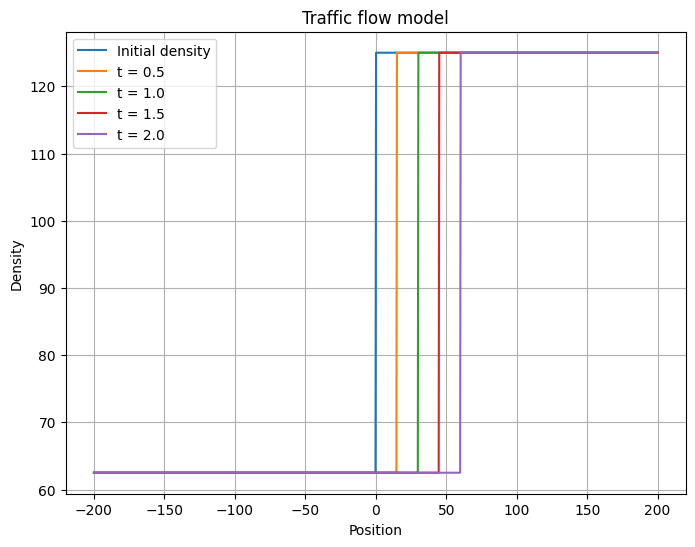

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
rho_max = 250  # Maximum density of cars
u_max = 120  # Maximum speed

# Define the functions
def u(rho):
    return u_max * (1 - rho / rho_max)

def f(rho):
    return rho * u(rho)

# Define the initial conditions
rho_l = 0.25 * rho_max  # Density on the left
rho_r = 0.5 * rho_max  # Density on the right

# Define the shock speed
def s(rho_l, rho_r):
    return (f(rho_l) - f(rho_r)) / (rho_l - rho_r)

# Create an array for the x values
x = np.linspace(-200, 200, 1000)

# Create an array for the initial density
rho_0 = np.where(x < 0, rho_l, rho_r)

# Plot the initial density
plt.figure(figsize=(8, 6))
plt.plot(x, rho_0, label='Initial density')

# Evolve the density in time and plot
for t in [0.5, 1.0, 1.5, 2.0]:
    rho_t = np.where(x / t < s(rho_l, rho_r), rho_l, rho_r)
    plt.plot(x, rho_t, label=f't = {t}')

plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Traffic flow model')
plt.legend()
plt.grid(True)
plt.show()


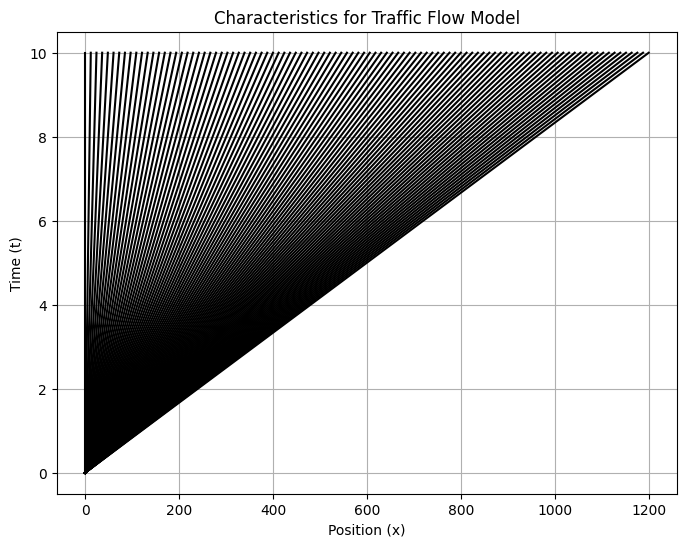

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
rho_max = 250  # Maximum density of cars
u_max = 120  # Maximum speed

# Define the velocity function
def u(rho):
    return u_max * (1 - rho / rho_max)

# Define the flux function
def f(rho):
    return rho * u(rho)

# Define the range for rho
rho_values = np.linspace(0, rho_max, 100)

# Calculate the characteristic speeds
characteristic_speeds = u(rho_values)

# Plot the characteristics
plt.figure(figsize=(8, 6))
for speed in characteristic_speeds:
    t_values = np.linspace(0, 10, 100)
    x_values = speed * t_values
    plt.plot(x_values, t_values, 'k-')  # 'k-' denotes a black solid line

# Customize the plot
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Characteristics for Traffic Flow Model')
plt.grid(True)
plt.show()



Godunov's method
$$u_j^{n+1} = u_j^n - \frac{k}{h}[F_{j+\frac{1}{2}}^n - F_{j-\frac{1}{2}}^n]$$

In [3]:
def Godunov(f, f_prime, f_type, f_extrema):
    def flux(j, u, dx, dt):
        if f_type == 'convex':
            flux = max(f(max(u[j], f_extrema)), f(min(u[j+1], f_extrema)))
        elif f_type == 'concave':
            flux = min(f(min(u[j], f_extrema)), f(max(u[j+1], f_extrema)))
        else:
            flux = 0
        return flux
    return flux


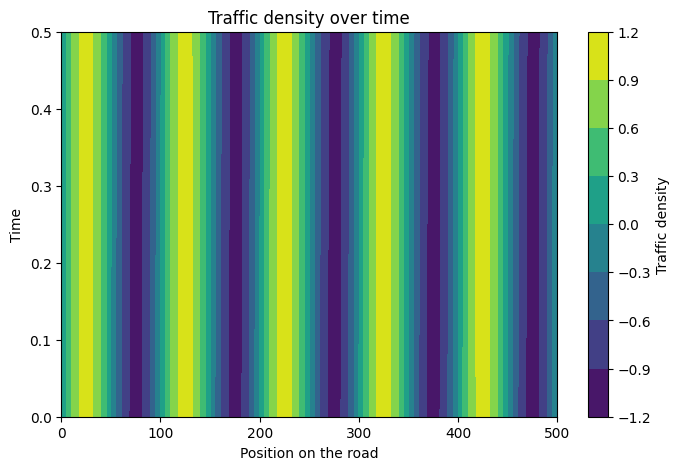

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho_max = 1.0  # Maximum density
u_max = 1.0  # Maximum speed
L = 500  # Length of the road
T = 0.5  # Time to solve until
nx = 100  # Number of grid points
nt = 50  # Number of time steps

# Discretize the domain
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)

# Initial condition
rho = np.sin(2 * np.pi * x)

# Function for the flux
def f(rho):
    return rho_max * u_max * (1 - rho / rho_max) * rho

# Initialize a 2D array to store the density at each time step
rho_all = np.zeros((nt, nx))
rho_all[0, :] = rho

# Time stepping loop
for n in range(1, nt):
    rho_n = rho.copy()
    for i in range(1, nx):
        # Godunov's method
        if rho_n[i-1] < rho_n[i]:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
        else:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
    rho_all[n, :] = rho

# Plot the solution
plt.figure(figsize=(8, 5))
plt.contourf(x, np.linspace(0, T, nt), rho_all, cmap='viridis')
plt.colorbar(label='Traffic density')
plt.xlabel('Position on the road')
plt.ylabel('Time')
plt.title('Traffic density over time')
plt.show()


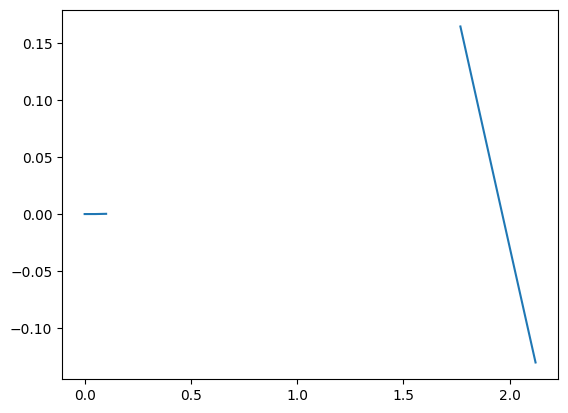

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
rho_max = 1.0  # Maximum density
u_max = 1.0  # Maximum speed
L = 5.0  # Length of the road
T = 0.5  # Time to solve until
nx = 100  # Number of grid points
nt = 50  # Number of time steps

# Discretize the domain
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)

# Initial condition
rho = np.sin(2 * np.pi * x)

# Function for the flux
def f(rho):
    return rho_max * u_max * (1 - rho / rho_max) * rho

# Initialize a 2D array to store the density at each time step
rho_all = np.zeros((nt, nx))
rho_all[0, :] = rho
# Time stepping loop
for n in range(1, nt):
    rho_n = rho.copy()
    for i in range(1, nx):
        # Godunov's method
        if rho_n[i-1] < rho_n[i]:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
        else:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
    rho_all[n, :] = rho
    # If n is a multiple of 100, plot the solution
    if n % 1 == 0:
        plt.plot(x, rho)
        plt.draw()
        plt.pause(0.01)

        plt.xlabel("Position on road")
        plt.ylabel("Traffic density")
        plt.legend()
        plt.clf()
        clear_output(wait = True)


# Plot the final solution
plt.plot(x, rho)
plt.show()


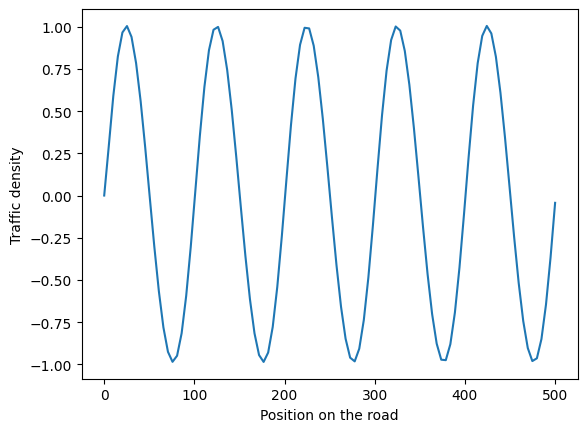

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho_max = 1  # Maximum density
u_max = 1  # Maximum speed
L = 500.0  # Length of the road
T = 0.5  # Time to solve until
nx = 100  # Number of grid points
nt = 50  # Number of time steps

# Discretize the domain
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)

# Initial condition
rho = np.sin(2 * np.pi * x)

# Function for the flux
def f(rho):
    return rho_max * (1 - rho / rho_max) * rho

# Time stepping loop
for n in range(nt):
    rho_n = rho.copy()
    for i in range(1, nx):
        # Godunov's method
        if rho_n[i-1] < rho_n[i]:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
        else:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))

# Plot the solution
plt.plot(x, rho)
plt.xlabel('Position on the road')
plt.ylabel('Traffic density')
plt.show()


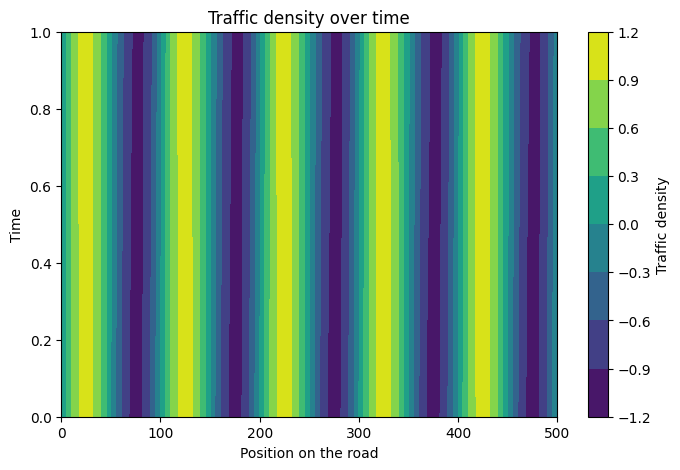

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho_max = 1  # Maximum density
u_max = 5.0  # Maximum speed
L = 500.0  # Length of the road
T = 1  # Time to solve until
nx = 100  # Number of grid points
nt = 50  # Number of time steps

# Discretize the domain
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)

# Initial condition
rho = np.sin(2 * np.pi * x)

# Function for the flux
def f(rho):
    return rho_max * (1 - rho / rho_max) * rho

# Initialize a 2D array to store the density at each time step
rho_all = np.zeros((nt, nx))
rho_all[0, :] = rho

# Time stepping loop
for n in range(1, nt):
    rho_n = rho.copy()
    for i in range(1, nx):
        # Godunov's method
        if rho_n[i-1] < rho_n[i]:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
        else:
            rho[i] = rho_n[i] - dt / dx * (f(rho_n[i]) - f(rho_n[i-1]))
    rho_all[n, :] = rho

# Plot the solution
plt.figure(figsize=(8, 5))
plt.contourf(x, np.linspace(0, T, nt), rho_all, cmap='viridis')
plt.colorbar(label='Traffic density')
plt.xlabel('Position on the road')
plt.ylabel('Time')
plt.title('Traffic density over time')
plt.show()


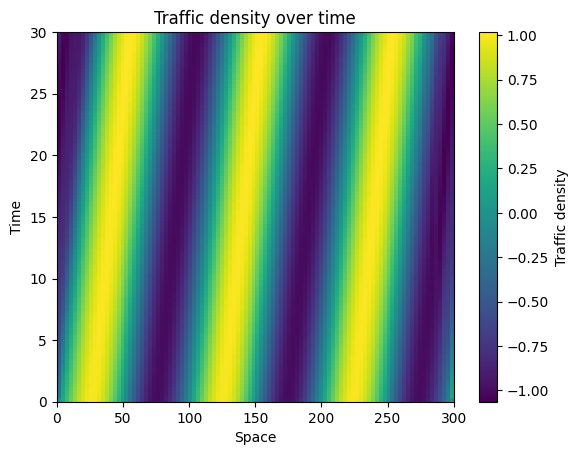

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem
L = 300.0  # length of the road
T = 30.0  # total time
Nx = 100  # number of spatial points in the grid
Nt = 100  # number of time points in the grid
c = 1.0  # speed of traffic

dx = L / (Nx - 1)  # spatial step size
dt = T / (Nt - 1)  # time step size

# Initialize the solution with the initial condition
u = np.zeros((Nt, Nx))
u[0, :] = np.sin(2 * np.pi * np.linspace(0, L, Nx))  # initial condition

# Time-stepping loop
for n in range(Nt - 1):
    # Forward difference for the time derivative
    # Central difference for the spatial derivative
    u[n+1, 1:-1] = u[n, 1:-1] - c * dt / (2 * dx) * (u[n, 2:] - u[n, :-2])

    # Periodic boundary conditions
    u[n+1, 0] = u[n+1, -2]
    u[n+1, -1] = u[n+1, 1]

# Create a 2D plot of the traffic density over time
plt.imshow(u, extent=[0, L, 0, T], origin='lower', aspect='auto')
plt.colorbar(label='Traffic density')
plt.xlabel('Space')
plt.ylabel('Time')
plt.title('Traffic density over time')
plt.show()


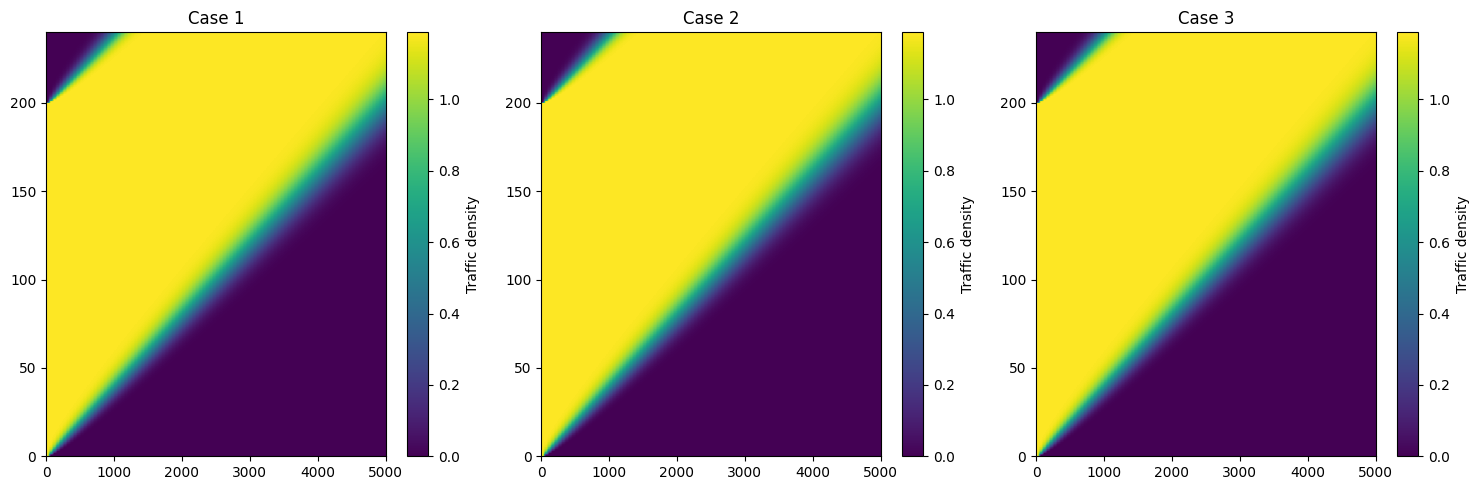

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem
L = 5000.0  # length of the road in meters
T = 240.0  # total time in seconds
Nx = 100  # number of spatial points in the grid
Nt = 240  # number of time points in the grid
u = 25.0  # speed of traffic in m/s

dx = L / (Nx - 1)  # spatial step size
dt = T / (Nt - 1)  # time step size

# Initialize the solution with the initial condition for Case 1
rho = np.zeros((Nt, Nx))

# Time-stepping loop for Case 1
for n in range(Nt - 1):
    # Forward difference for the time derivative
    # Backward difference for the spatial derivative
    rho[n+1, 1:] = rho[n, 1:] - u * dt / dx * (rho[n, 1:] - rho[n, :-1])

# Initialize the solution with the initial condition for Case 2
rho = np.zeros((Nt, Nx))
rho[:60, 0] = 60 / dx  # 60 cars enter the road at 1 car per second

# Time-stepping loop for Case 2
for n in range(Nt - 1):
    # Forward difference for the time derivative
    # Backward difference for the spatial derivative
    rho[n+1, 1:] = rho[n, 1:] - u * dt / dx * (rho[n, 1:] - rho[n, :-1])

# Initialize the solution with the initial condition for Case 3
rho = np.zeros((Nt, Nx))
rho[:200, 0] = 60 / dx  # 60 cars enter the road at 1 car per second
rho[200:, -1] = 60 / dx  # 60 cars leave the road at 1 car per second

# Time-stepping loop for Case 3
for n in range(Nt - 1):
    # Forward difference for the time derivative
    # Backward difference for the spatial derivative
    rho[n+1, 1:] = rho[n, 1:] - u * dt / dx * (rho[n, 1:] - rho[n, :-1])

# Create a 2D plot of the traffic density over time for each case
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(rho, extent=[0, L, 0, T], origin='lower', aspect='auto')
plt.colorbar(label='Traffic density')
plt.title('Case 1')

plt.subplot(1, 3, 2)
plt.imshow(rho, extent=[0, L, 0, T], origin='lower', aspect='auto')
plt.colorbar(label='Traffic density')
plt.title('Case 2')

plt.subplot(1, 3, 3)
plt.imshow(rho, extent=[0, L, 0, T], origin='lower', aspect='auto')
plt.colorbar(label='Traffic density')
plt.title('Case 3')

plt.tight_layout()
plt.show()


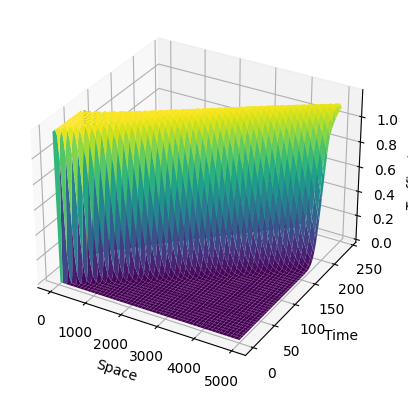

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the problem
L = 5000.0  # length of the road in meters
T = 240.0  # total time in seconds
Nx = 100  # number of spatial points in the grid
Nt = 240  # number of time points in the grid
u = 25.0  # speed of traffic in m/s

dx = L / (Nx - 1)  # spatial step size
dt = T / (Nt - 1)  # time step size

# Initialize the solution with the initial condition
rho = np.zeros((Nt, Nx))
rho[:60, 0] = 60 / dx  # 60 cars enter the road at 1 car per second

# Time-stepping loop
for n in range(Nt - 1):
    # Forward difference for the time derivative
    # Backward difference for the spatial derivative
    rho[n+1, 1:] = rho[n, 1:] - u * dt / dx * (rho[n, 1:] - rho[n, :-1])

# Create a 3D plot of the traffic density over time
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, rho, cmap='viridis')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('Traffic density')
plt.show()
